https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(
    {
        'A': 'foo bar foo bar foo bar foo foo'.split(),
        'B': 'one one two three two two one three'.split(),
        'C': np.arange(8), 
        'D': np.arange(8) * 2
    }
)

In [3]:
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


In [15]:
df.loc[(df.C % 2 == 0) & (df.B == 'two')]

,A,B,C,D
2,foo,two,2,4
4,foo,two,4,8


In [16]:
df.loc[(df.B.isin(['three']))]

,A,B,C,D
3,bar,three,3,6
7,foo,three,7,14


In [17]:
df2 = df.set_index(['B'])
df2.loc['one']

,A,C,D
B,,,
one,foo,0,0
one,bar,1,2
one,foo,6,12


In [18]:
df2.loc[df2.index.isin(['one','two'])]

,A,C,D
B,,,
one,foo,0,0
one,bar,1,2
two,foo,2,4
two,foo,4,8
two,bar,5,10
one,foo,6,12


In [6]:
df[['A']][df.A == 'foo']

,A
0,foo
2,foo
4,foo
6,foo
7,foo


In [20]:
df["E"] = df["C"] - df["C"].mean()

In [21]:
df

,A,B,C,D,E
0,foo,one,0,0,-3.5
1,bar,one,1,2,-2.5
2,foo,two,2,4,-1.5
3,bar,three,3,6,-0.5
4,foo,two,4,8,0.5
5,bar,two,5,10,1.5
6,foo,one,6,12,2.5
7,foo,three,7,14,3.5


In [53]:
def sep_pos_neg(df, col, threshold=0.0):
    "separate one column into two by positive/negative values"
    col_pos = col+"_pos"
    df[col_pos] = df[col][df[col] > threshold]
    df[col_pos].fillna(0, inplace=True)
    col_neg = col+"_neg"
    df[col_neg] = df[col][df[col] <= threshold]
    df[col_neg].fillna(0, inplace=True)
    return df

In [54]:
df.drop('E_pos',axis=1,inplace=True)
df.drop('E_neg',axis=1,inplace=True)

In [55]:
df = sep_pos_neg(df, "E", 0.5)

In [56]:
df

,A,B,C,D,E,E_pos,E_neg
0,foo,one,0,0,-3.5,0.0,-3.5
1,bar,one,1,2,-2.5,0.0,-2.5
2,foo,two,2,4,-1.5,0.0,-1.5
3,bar,three,3,6,-0.5,0.0,-0.5
4,foo,two,4,8,0.5,0.0,0.5
5,bar,two,5,10,1.5,1.5,0.0
6,foo,one,6,12,2.5,2.5,0.0
7,foo,three,7,14,3.5,3.5,0.0


In [36]:
df["E_pos"] = df["E"][df["E"] > 0]

df["E_pos"].fillna(0, inplace=True)
#df.drop('Ep',axis=1,inplace=True)
df

,A,B,C,D,E,E_pos
0,foo,one,0,0,-3.5,0.0
1,bar,one,1,2,-2.5,0.0
2,foo,two,2,4,-1.5,0.0
3,bar,three,3,6,-0.5,0.0
4,foo,two,4,8,0.5,0.5
5,bar,two,5,10,1.5,1.5
6,foo,one,6,12,2.5,2.5
7,foo,three,7,14,3.5,3.5


In [19]:
df[df.A == 'foo']

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [7]:
df['A'][df.A == 'foo']

0    foo
2    foo
4    foo
6    foo
7    foo
Name: A, dtype: object

<AxesSubplot:>

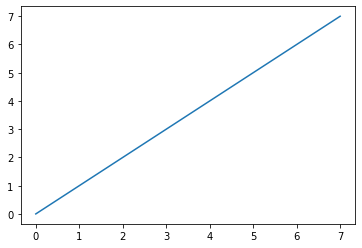

In [8]:
df["C"].plot()

<AxesSubplot:>

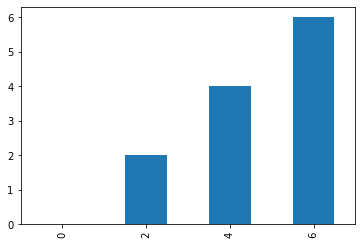

In [11]:
df["C"][df.C % 2 == 0].plot.bar()